### Preprocess Data with Seurat

In [1]:
library(Seurat)

In [ ]:
cbmc.rna <- as.sparse(read.csv(file = "data/GSE100866_CBMC_8K_13AB_10X-RNA_umi.csv", sep = ",", 
    header = TRUE, row.names = 1))

# To make life a bit easier going forward, we're going to discard all but the top 100 most
# highly expressed mouse genes, and remove the 'HUMAN_' from the CITE-seq prefix
#Valuable for CITE-seq analyses, where we typically spike in rare 
#populations of 'negative control' cells from a different species.
cbmc.rna <- CollapseSpeciesExpressionMatrix(cbmc.rna)

In [ ]:
dim(cbmc.rna)

In [32]:
cbmc.adt <- as.sparse(read.csv(file = "data/GSE100866_CBMC_8K_13AB_10X-ADT_umi.csv", sep = ",", 
    header = TRUE, row.names = 1))
cbmc.adt <- cbmc.adt[setdiff(rownames(x = cbmc.adt), c("CCR5", "CCR7", "CD10")), ]

In [ ]:
cbmc <- CreateSeuratObject(counts = cbmc.rna)

# standard log-normalization
cbmc <- NormalizeData(cbmc)

# choose ~1k variable features, DB: default is 2k
cbmc <- FindVariableFeatures(cbmc)

# standard scaling (no regression)
cbmc <- ScaleData(cbmc)

# Run PCA, select 13 PCs for tSNE visualization and graph-based clustering
cbmc <- RunPCA(cbmc, verbose = FALSE)
ElbowPlot(cbmc, ndims = 50)

**helpful to check Seurat documentation for Seurat and Assay Object methods/attributes**
1. https://github.com/satijalab/seurat/wiki/Seurat
2. https://github.com/satijalab/seurat/wiki/Assay

In [18]:
write.csv(cbmc@assays$RNA@scale.data,'data/filtered_cbmc_assay.csv')

In [6]:
setwd("/home/jovyan/work/")

In [8]:
list.files()

[1] "Dockerfile"                                        
 [2] "Dockerfile_old"                                    
 [3] "Dockerfilev2"                                      
 [4] "elbow_plots.pdf"                                   
 [5] "elbow_plotsv2.pdf"                                 
 [6] "export_data.nb.html"                               
 [7] "export_data.Rmd"                                   
 [8] "filtered_cmbc_assay.csv"                           
 [9] "GSE100866_CBMC_8K_13AB_10X-ADT_umi.csv"            
[10] "GSE100866_CBMC_8K_13AB_10X-RNA_umi.csv"            
[11] "GSE100866_CBMC_8K_13AB_10X-RNA_umi.csv.gz.download"
[12] "PC_Criteria.ipynb"                                 
[13] "PCA_Elbow_Plots.ipynb"                             
[14] "pca.aux"                                           
[15] "pca.dvi"                                           
[16] "pca.log"                                           
[17] "pca.pdf"                                           
[18] "pca.synctex.gz"                                    
[19] "pca.tex"                                           
[20] "Seurat Output Analysis (in Python).ipynb"          
[21] "Seurat_Construct_Subclusters.ipynb"                
[22] "Seurat_Data_R-Check.ipynb"                         
[23] "Seurat_Data_R.ipynb"                               
[24] "Seurat_Get_Data.ipynb"                             
[25] "Seurat_Proteomics_Sim.csv"                         
[26] "Seurat_Proteomics_Simv2.csv"                       
[27] "seurat-docker-master"                              
[28] "SingleCellSeurat.log"                              
[29] "SingleCellSeurat.Rmd"                              
[30] "SingleCellSeurat.tex"

In [9]:
cbmc.rna <- read.csv(file = "data/filtered_cmbc_assay.csv", sep = ",", 
    header = TRUE, row.names = 1)

In [16]:
cbmc <- CreateSeuratObject(counts = cbmc.rna)
cbmc <- FindVariableFeatures(cbmc)
cbmc <- ScaleData(cbmc)
cbmc <- RunPCA(cbmc, verbose = FALSE)

Warning message in eval(predvars, data, env):
“NaNs produced”
Warning message in hvf.info$variance.expected[not.const] <- 10^fit$fitted:
“number of items to replace is not a multiple of replacement length”
Centering and scaling data matrix



In [25]:
#1035
#p-values infated towards larger clusters.  
cbmc=Seurat::JackStraw(cbmc,num.replicate = 200)
# The jackStraw plot compares the distribution of P-values for each PC with a uniform distribution (dashed line)
# 'Significant' PCs will have a strong enrichment of genes with low p-values (solid curve above dashed line)
# In this case PC1-9 are strongly significant

Warning message:
“Invalid name supplied, making object name syntactically valid. New object name is Seurat..JackStraw.RNA.pca; see ?make.names for more details on syntax validity”


In [29]:
cbmc = ScoreJackStraw(cbmc, dims = 1:20, score.thresh = 1e-05)

Warning message:
“Removed 28354 rows containing missing values (geom_point).”


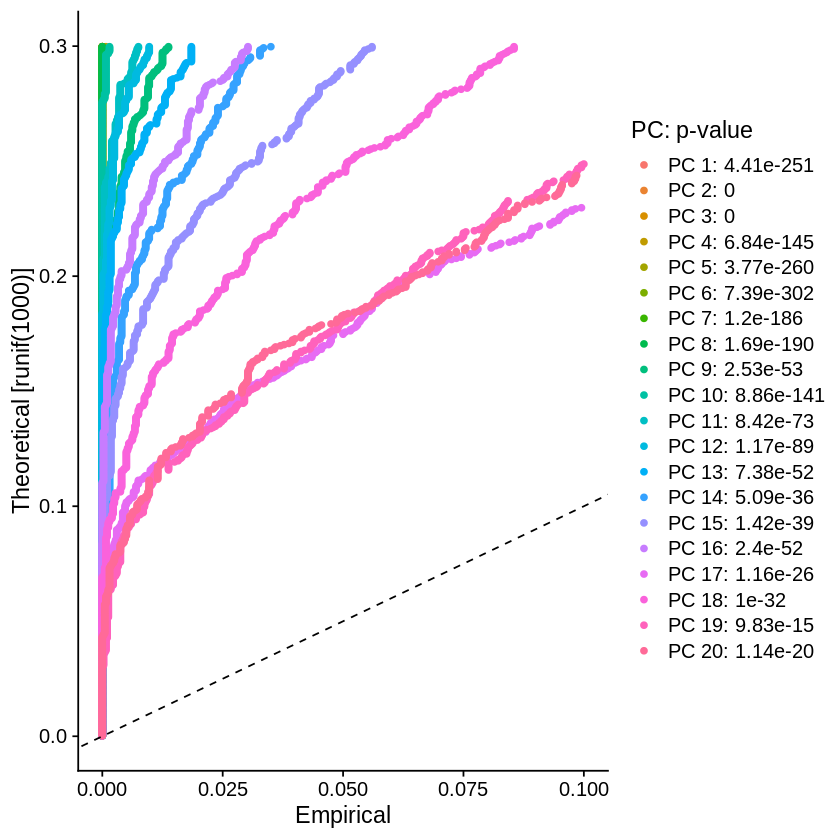

In [30]:
#PC 19 is the least significant
Seurat::JackStrawPlot(cbmc, dims = 1:20)

### Polish ADT Data

In [33]:
cbmc[["ADT"]] <- CreateAssayObject(counts = cbmc.adt)

# Now we can repeat the preprocessing (normalization and scaling) steps that we typically run
# with RNA, but modifying the 'assay' argument.  For CITE-seq data, we do not recommend typical
# LogNormalization. Instead, we use a centered log-ratio (CLR) normalization, computed
# independently for each feature.  This is a slightly improved procedure from the original
# publication, and we will release more advanced versions of CITE-seq normalizations soon.
cbmc <- NormalizeData(cbmc, assay = "ADT", normalization.method = "CLR")
cbmc <- ScaleData(cbmc, assay = "ADT")

Normalizing across features

Centering and scaling data matrix



In [34]:
write.csv(cbmc@assays$ADT@scale.data,'filtered_cbmc_adt_assay.csv')

### Data from New Method

In [37]:
cbmc.new <- read.csv(file = "reduced_matrix.csv", sep = ",")

In [38]:
head(cbmc.new)

,X,X0,X1,X2,X3,X4,X5,X6,X7,X8,⋯,X8607,X8608,X8609,X8610,X8611,X8612,X8613,X8614,X8615,X8616
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,-0.045324172,0.005877335,0.005185826,-0.007413787,0.01078780,-0.035654979,-0.002741322,0.008948241,0.004032940,⋯,0.01699153,-0.034664703,-0.008850911,-0.01555083,0.003511504,-0.06368712,-0.0215909606,-0.002040751,0.003637492,-0.01119023
2,1,-0.118515065,-0.057220405,-0.091332846,-0.105344395,-0.06636626,-0.110998182,-0.123606350,-0.051446505,-0.058052603,⋯,-0.14921918,-0.056877562,0.007222910,-0.06141733,-0.071043905,-0.06539650,-0.1328044357,0.061993386,0.046076145,-0.14417480
3,2,-0.009391043,-0.096836847,-0.042853935,-0.077237478,-0.04329816,-0.071252604,0.025392619,-0.093120730,-0.064201072,⋯,0.07613246,-0.160827255,0.074322741,-0.04184582,-0.042216933,0.27488276,0.0093981270,-0.004587757,-0.087631925,-0.03927456
4,3,0.002626339,0.033899768,0.037508676,0.025486652,0.06101471,0.001650084,0.007487294,0.061691847,0.064223114,⋯,-0.02939139,0.005404886,-0.048343882,-0.05047023,-0.021280478,-0.03394363,-0.0649516386,0.020470134,0.067201353,0.02470938
5,4,-0.242353926,-0.265573282,-0.270374898,-0.279606618,-0.25757018,-0.233939802,-0.251790394,-0.264407170,-0.278691040,⋯,0.29659689,0.309628582,-0.200081985,-0.23472177,-0.242603592,0.84906706,-0.1936917276,-0.047039402,0.057683222,-0.14702395
6,5,-0.057852577,-0.028615421,-0.056435809,-0.057866016,-0.07128010,-0.015559033,0.022369321,0.053052286,0.001609652,⋯,-0.16782317,-0.138035043,-0.064668122,-0.01896246,-0.083926204,-0.12126801,-0.0009967211,-0.110943187,-0.007634924,-0.14430554


In [40]:
cbmc.new$X <- NULL

In [41]:
head(cbmc.new)

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,⋯,X8607,X8608,X8609,X8610,X8611,X8612,X8613,X8614,X8615,X8616
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.045324172,0.005877335,0.005185826,-0.007413787,0.01078780,-0.035654979,-0.002741322,0.008948241,0.004032940,-0.031449516,⋯,0.01699153,-0.034664703,-0.008850911,-0.01555083,0.003511504,-0.06368712,-0.0215909606,-0.002040751,0.003637492,-0.01119023
2,-0.118515065,-0.057220405,-0.091332846,-0.105344395,-0.06636626,-0.110998182,-0.123606350,-0.051446505,-0.058052603,-0.129168802,⋯,-0.14921918,-0.056877562,0.007222910,-0.06141733,-0.071043905,-0.06539650,-0.1328044357,0.061993386,0.046076145,-0.14417480
3,-0.009391043,-0.096836847,-0.042853935,-0.077237478,-0.04329816,-0.071252604,0.025392619,-0.093120730,-0.064201072,-0.083545168,⋯,0.07613246,-0.160827255,0.074322741,-0.04184582,-0.042216933,0.27488276,0.0093981270,-0.004587757,-0.087631925,-0.03927456
4,0.002626339,0.033899768,0.037508676,0.025486652,0.06101471,0.001650084,0.007487294,0.061691847,0.064223114,0.002421822,⋯,-0.02939139,0.005404886,-0.048343882,-0.05047023,-0.021280478,-0.03394363,-0.0649516386,0.020470134,0.067201353,0.02470938
5,-0.242353926,-0.265573282,-0.270374898,-0.279606618,-0.25757018,-0.233939802,-0.251790394,-0.264407170,-0.278691040,-0.231937342,⋯,0.29659689,0.309628582,-0.200081985,-0.23472177,-0.242603592,0.84906706,-0.1936917276,-0.047039402,0.057683222,-0.14702395
6,-0.057852577,-0.028615421,-0.056435809,-0.057866016,-0.07128010,-0.015559033,0.022369321,0.053052286,0.001609652,-0.029308571,⋯,-0.16782317,-0.138035043,-0.064668122,-0.01896246,-0.083926204,-0.12126801,-0.0009967211,-0.110943187,-0.007634924,-0.14430554


In [43]:
dim(cbmc.new)

[1] 2000 8617

In [ ]:
cbmc[["New"]] <- CreateAssayObject(counts = cbmc.new)
cbmc <- ScaleData(cbmc, assay = "New")

In [ ]:
cbmc <- RunPCA(cbmc, verbose = FALSE, assay = "New")